# **Openning**

Goals:

1. What range of happiness score is majority of countries in?

2. What are the other factors that have strong correlation with happiness score?

3. What region has the most countries included in the dataset?

4. What can we see from the trend of top 5 countries in term of happiness score?

5. How is Japanese happiness score trending?

6. Compare trend of happpiness score of United States and Japan.

Steps:

0. Importing libraries

1. Load the data

2. EDA

3. Conclusion


---



# **0. Importing libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Load the data**




In [3]:
# load the data
df_2015 = pd.read_csv('/content/drive/MyDrive/1. Data Science/3. 18-09-2023 Case Study: The Happiness Report/2015.csv')

In [4]:
# show the dataset
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
# get the basic statistics of dataset
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
# check for missing value
df_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# **2. EDA**

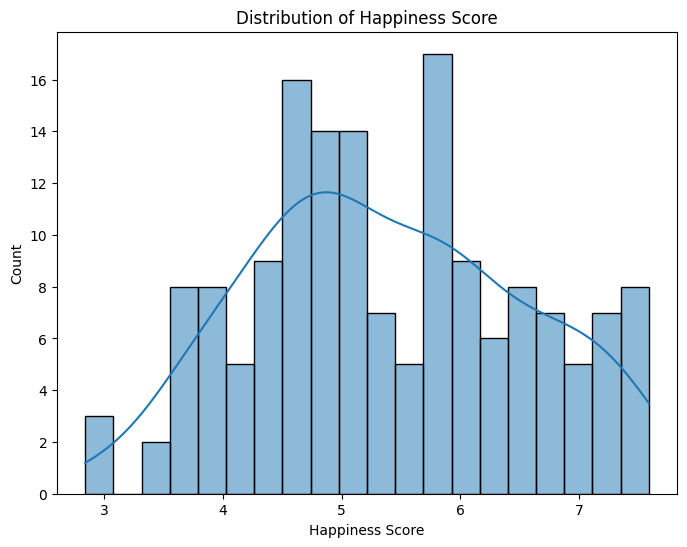

In [7]:
# show the distribution of the ladder score
plt.figure(figsize=(8, 6))
sns.histplot(
    df_2015['Happiness Score'],
    bins=20,
    kde=True
)
plt.title('Distribution of Happiness Score')
plt.show()

*We can see that the majority is in the range of 4.5 to 5.5.*

---



<ipython-input-8-cc7466ce6a9c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_2015.corr()


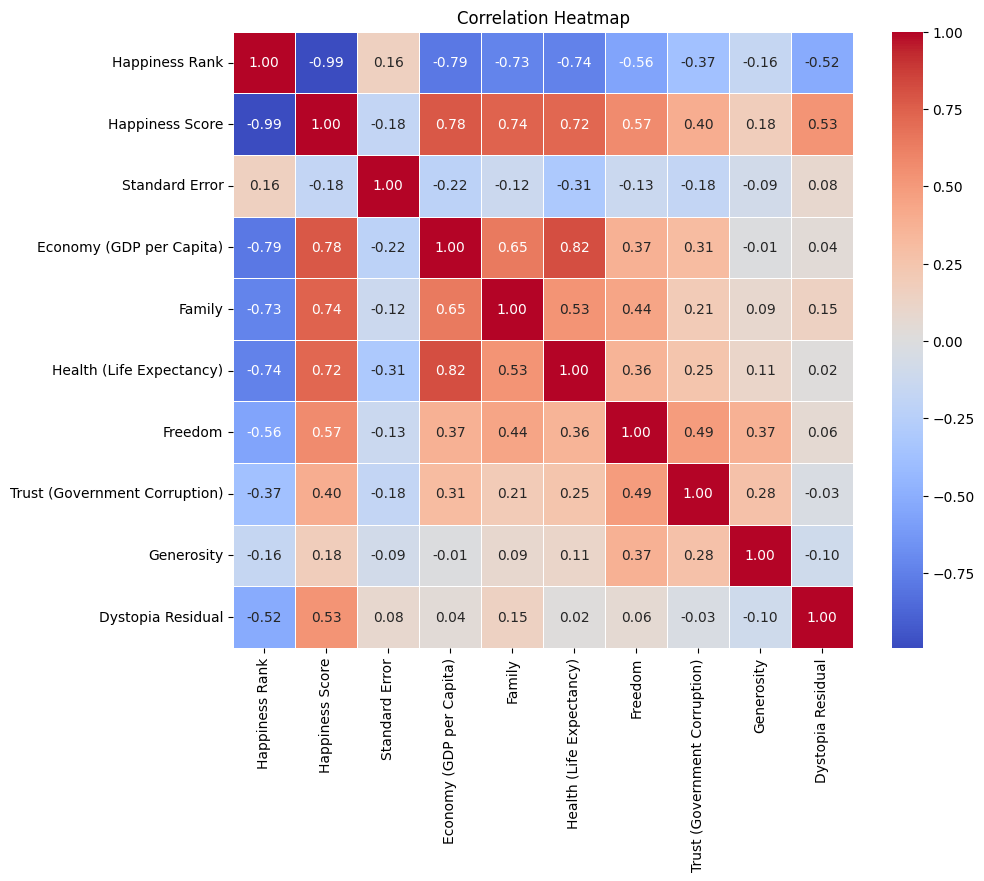

In [8]:
# see the correlation between variables
correlation_matrix = df_2015.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

*Strong pairs of correlation (>= 0.7) with happiness score are: 1) Economy, 2) Family and 3) Health.*

---



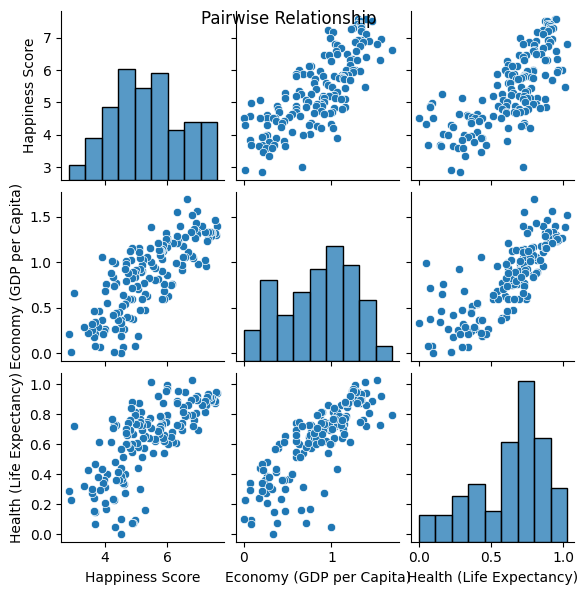

In [9]:
# visualize pairwise relationships
sns.pairplot(df_2015[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)']], height=2)
plt.suptitle('Pairwise Relationship')
plt.show()

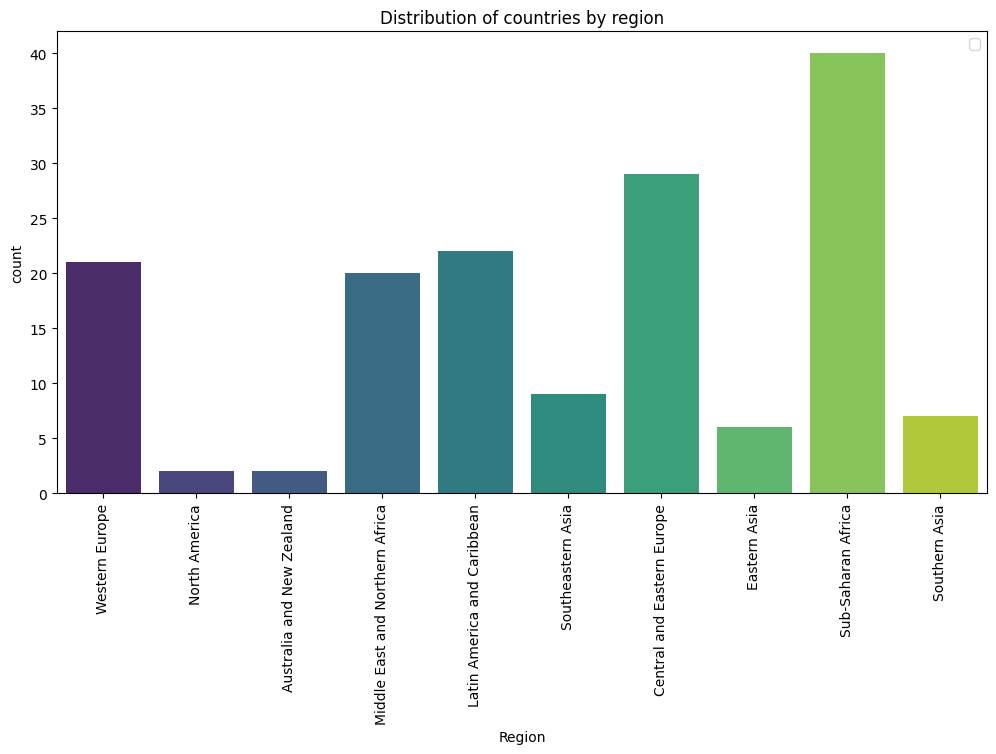

In [10]:
# show the count of each region
plt.figure(figsize=(12, 6))
sns.countplot(data=df_2015, x='Region', palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Distribution of countries by region')
plt.legend()

*Sub-Sahara Africa region has the highest number of countries.*

---



In [11]:
# check the happiness rank and happiness score of year 2015
df_2015[['Country', 'Happiness Rank', 'Happiness Score']]

,Country,Happiness Rank,Happiness Score
0,Switzerland,1,7.587
1,Iceland,2,7.561
2,Denmark,3,7.527
3,Norway,4,7.522
4,Canada,5,7.427
...,...,...,...
153,Rwanda,154,3.465
154,Benin,155,3.340
155,Syria,156,3.006
156,Burundi,157,2.905


In [12]:
# check the happiness rank and happiness score of year 2016
df_2016 = pd.read_csv('/content/drive/MyDrive/1. Data Science/3. 18-09-2023 Case Study: The Happiness Report/2016.csv')
df_2016[['Country', 'Happiness Rank', 'Happiness Score']]

,Country,Happiness Rank,Happiness Score
0,Denmark,1,7.526
1,Switzerland,2,7.509
2,Iceland,3,7.501
3,Norway,4,7.498
4,Finland,5,7.413
...,...,...,...
152,Benin,153,3.484
153,Afghanistan,154,3.360
154,Togo,155,3.303
155,Syria,156,3.069


In [13]:
# check the happiness rank and happiness score of year 2017
df_2017 = pd.read_csv('/content/drive/MyDrive/1. Data Science/3. 18-09-2023 Case Study: The Happiness Report/2017.csv')
df_2017[['Country', 'Happiness.Rank', 'Happiness.Score']]

,Country,Happiness.Rank,Happiness.Score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504
3,Switzerland,4,7.494
4,Finland,5,7.469
...,...,...,...
150,Rwanda,151,3.471
151,Syria,152,3.462
152,Tanzania,153,3.349
153,Burundi,154,2.905


In [14]:
# change the name columns of year 2017
df_2017.rename(columns={'Happiness.Rank': 'Happiness Rank'}, inplace=True)
df_2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
df_2017[['Country', 'Happiness Rank', 'Happiness Score']]

,Country,Happiness Rank,Happiness Score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504
3,Switzerland,4,7.494
4,Finland,5,7.469
...,...,...,...
150,Rwanda,151,3.471
151,Syria,152,3.462
152,Tanzania,153,3.349
153,Burundi,154,2.905


In [15]:
# check the happiness rank and happiness score of year 2018
df_2018 = pd.read_csv('/content/drive/MyDrive/1. Data Science/3. 18-09-2023 Case Study: The Happiness Report/2018.csv')
df_2018[['Country or region', 'Overall rank', 'Score']]

,Country or region,Overall rank,Score
0,Finland,1,7.632
1,Norway,2,7.594
2,Denmark,3,7.555
3,Iceland,4,7.495
4,Switzerland,5,7.487
...,...,...,...
151,Yemen,152,3.355
152,Tanzania,153,3.303
153,South Sudan,154,3.254
154,Central African Republic,155,3.083


In [16]:
# change the name column of year 2018
df_2018.rename(columns={'Country or region': 'Country'}, inplace=True)
df_2018.rename(columns={'Overall rank': 'Happiness Rank'}, inplace=True)
df_2018.rename(columns={'Score': 'Happiness Score'}, inplace=True)
df_2018[['Country', 'Happiness Rank', 'Happiness Score']]

,Country,Happiness Rank,Happiness Score
0,Finland,1,7.632
1,Norway,2,7.594
2,Denmark,3,7.555
3,Iceland,4,7.495
4,Switzerland,5,7.487
...,...,...,...
151,Yemen,152,3.355
152,Tanzania,153,3.303
153,South Sudan,154,3.254
154,Central African Republic,155,3.083


In [17]:
# check the happiness rank and happiness score of year 2019
df_2019 = pd.read_csv('/content/drive/MyDrive/1. Data Science/3. 18-09-2023 Case Study: The Happiness Report/2019.csv')
df_2019[['Country or region', 'Overall rank', 'Score']]

,Country or region,Overall rank,Score
0,Finland,1,7.769
1,Denmark,2,7.600
2,Norway,3,7.554
3,Iceland,4,7.494
4,Netherlands,5,7.488
...,...,...,...
151,Rwanda,152,3.334
152,Tanzania,153,3.231
153,Afghanistan,154,3.203
154,Central African Republic,155,3.083


In [18]:
# change the name column of year 2019
df_2019.rename(columns={'Country or region': 'Country'}, inplace=True)
df_2019.rename(columns={'Overall rank': 'Happiness Rank'}, inplace=True)
df_2019.rename(columns={'Score': 'Happiness Score'}, inplace=True)
df_2019[['Country', 'Happiness Rank', 'Happiness Score']]

,Country,Happiness Rank,Happiness Score
0,Finland,1,7.769
1,Denmark,2,7.600
2,Norway,3,7.554
3,Iceland,4,7.494
4,Netherlands,5,7.488
...,...,...,...
151,Rwanda,152,3.334
152,Tanzania,153,3.231
153,Afghanistan,154,3.203
154,Central African Republic,155,3.083


In [19]:
# merge all 5 five dataframes

# select columns from each dataframe
df_2015_selected = df_2015[['Country', 'Happiness Rank', 'Happiness Score']]
df_2016_selected = df_2016[['Country', 'Happiness Rank', 'Happiness Score']]
df_2017_selected = df_2017[['Country', 'Happiness Rank', 'Happiness Score']]
df_2018_selected = df_2018[['Country', 'Happiness Rank', 'Happiness Score']]
df_2019_selected = df_2019[['Country', 'Happiness Rank', 'Happiness Score']]

# merge those selected columns
merged_df = df_2015_selected.merge(df_2016_selected, on='Country', suffixes=(' 2015', ' 2016')).merge(df_2017_selected, on='Country', suffixes=('2016', ' 2017')).merge(df_2018_selected, on='Country', suffixes=(' 2017', ' 2018')).merge(df_2019_selected, on='Country', suffixes=('2018', ' 2019'))

# show the merged dataframe
merged_df.head(10)

,Country,Happiness Rank 2015,Happiness Score 2015,Happiness Rank 2016,Happiness Score 2016,Happiness Rank 2017,Happiness Score 2017,Happiness Rank 2018,Happiness Score 2018,Happiness Rank,Happiness Score
0,Switzerland,1,7.587,2,7.509,4,7.494,5,7.487,6,7.480
1,Iceland,2,7.561,3,7.501,3,7.504,4,7.495,4,7.494
2,Denmark,3,7.527,1,7.526,2,7.522,3,7.555,2,7.600
3,Norway,4,7.522,4,7.498,1,7.537,2,7.594,3,7.554
4,Canada,5,7.427,6,7.404,7,7.316,7,7.328,9,7.278
5,Finland,6,7.406,5,7.413,5,7.469,1,7.632,1,7.769
6,Netherlands,7,7.378,7,7.339,6,7.377,6,7.441,5,7.488
7,Sweden,8,7.364,10,7.291,9,7.284,9,7.314,7,7.343
8,New Zealand,9,7.286,8,7.334,8,7.314,8,7.324,8,7.307
9,Australia,10,7.284,9,7.313,10,7.284,10,7.272,11,7.228


In [20]:
# change the name of last two columns of merge_df dataframe
merged_df.rename(columns={'Happiness Rank': 'Happiness Rank 2019'}, inplace=True)
merged_df.rename(columns={'Happiness Score': 'Happiness Score 2019'}, inplace=True)
merged_df.head(10)

,Country,Happiness Rank 2015,Happiness Score 2015,Happiness Rank 2016,Happiness Score 2016,Happiness Rank 2017,Happiness Score 2017,Happiness Rank 2018,Happiness Score 2018,Happiness Rank 2019,Happiness Score 2019
0,Switzerland,1,7.587,2,7.509,4,7.494,5,7.487,6,7.480
1,Iceland,2,7.561,3,7.501,3,7.504,4,7.495,4,7.494
2,Denmark,3,7.527,1,7.526,2,7.522,3,7.555,2,7.600
3,Norway,4,7.522,4,7.498,1,7.537,2,7.594,3,7.554
4,Canada,5,7.427,6,7.404,7,7.316,7,7.328,9,7.278
5,Finland,6,7.406,5,7.413,5,7.469,1,7.632,1,7.769
6,Netherlands,7,7.378,7,7.339,6,7.377,6,7.441,5,7.488
7,Sweden,8,7.364,10,7.291,9,7.284,9,7.314,7,7.343
8,New Zealand,9,7.286,8,7.334,8,7.314,8,7.324,8,7.307
9,Australia,10,7.284,9,7.313,10,7.284,10,7.272,11,7.228


*We just created a new dataframe that has the Happiness Rank and Happiness Score of each country in each year.*

---



In [21]:
# check the rows that have null values
merged_df.isnull().sum().sort_values(ascending=False)

Country                 0
Happiness Rank 2015     0
Happiness Score 2015    0
Happiness Rank 2016     0
Happiness Score 2016    0
Happiness Rank 2017     0
Happiness Score 2017    0
Happiness Rank 2018     0
Happiness Score 2018    0
Happiness Rank 2019     0
Happiness Score 2019    0
dtype: int64

In [22]:
# check info of the dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 140
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               141 non-null    object 
 1   Happiness Rank 2015   141 non-null    int64  
 2   Happiness Score 2015  141 non-null    float64
 3   Happiness Rank 2016   141 non-null    int64  
 4   Happiness Score 2016  141 non-null    float64
 5   Happiness Rank 2017   141 non-null    int64  
 6   Happiness Score 2017  141 non-null    float64
 7   Happiness Rank 2018   141 non-null    int64  
 8   Happiness Score 2018  141 non-null    float64
 9   Happiness Rank 2019   141 non-null    int64  
 10  Happiness Score 2019  141 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 13.2+ KB


*We can see that there are 141 rows left because some countries may not have the matching values for different years.*

---



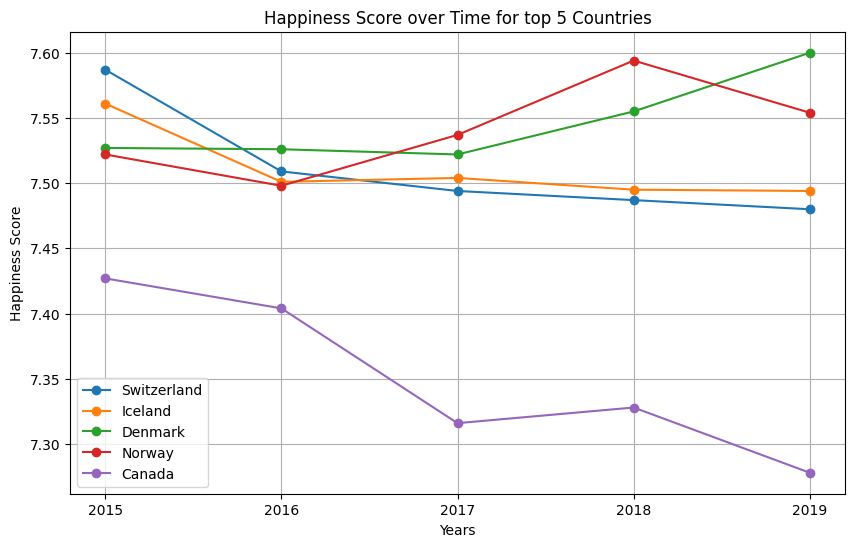

In [23]:
# plot the trend of happiness score over the years (using time series graph)
years = ['2015', '2016', '2017', '2018', '2019']

plt.figure(figsize=(10, 6))

for i in merged_df['Country'].head().unique():
    data = merged_df[merged_df['Country'] == i]
    scores = [data[f'Happiness Score {j}'].values for j in years]
    plt.plot(years, scores, marker='o', label=i)

plt.title('Happiness Score over Time for top 5 Countries')
plt.xlabel('Years')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

*We can see that the happiness score of Denmark is constantly increasing while Canada's is significantly dropping.*

---



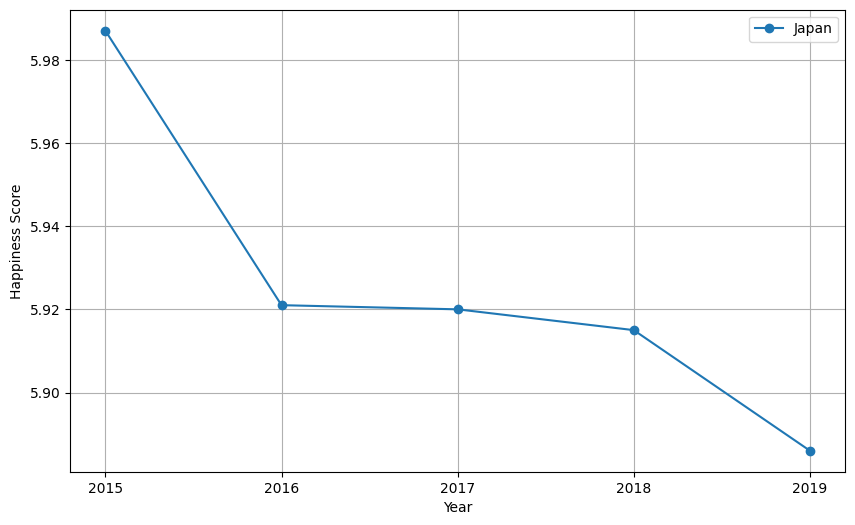

In [24]:
# plot the trend of happiness score over the years for Japan
data_jp = merged_df[merged_df['Country'] == 'Japan']
scores_jp = [data_jp[f'Happiness Score {i}'] for i in years]
plt.figure(figsize=(10, 6))
plt.plot(years, scores_jp, marker='o', label='Japan')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.legend()

*Japan's happiness scores stay steadily for the past 5 years despite slightly drops.*

---



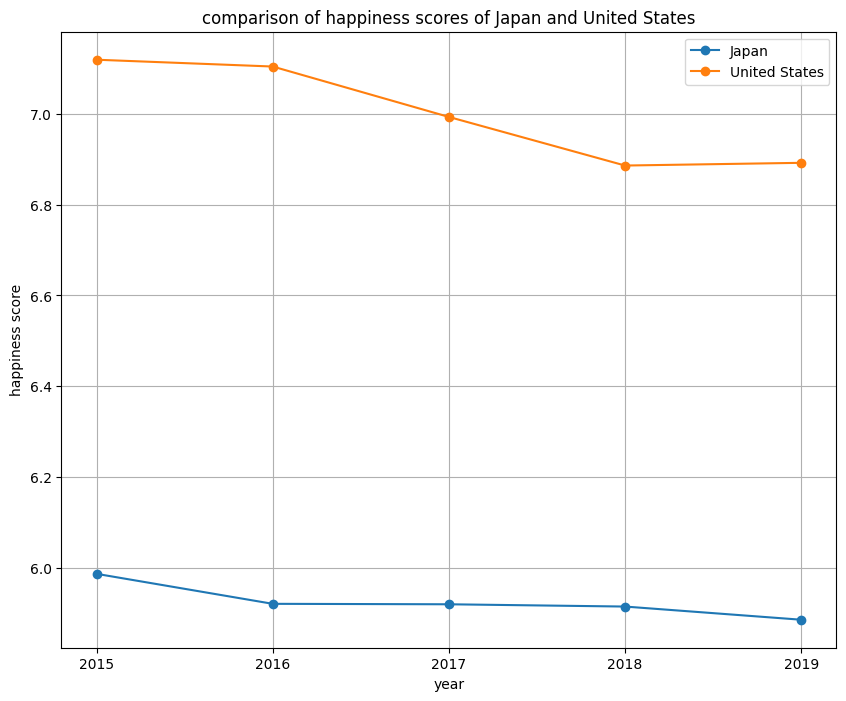

In [56]:
# compare the graph of the United States and France over the years
years = ['2015', '2016', '2017', '2018', '2019']
countries = ['Japan', 'United States']

plt.figure(figsize=(10, 8))

for i in countries:
    data = merged_df[merged_df['Country'] == i]
    scores = [data[f'Happiness Score {j}'].values[0] for j in years]
    plt.plot(years, scores, marker='o', label=i)

plt.xlabel('year')
plt.ylabel('happiness score')
plt.title(f'comparison of happiness scores of {countries[0]} and {countries[1]}')
plt.grid(True)
plt.legend()
plt.show()

*We can see that the happiness score of United States is higher than that of Japan.*

---



# **3. Conclusion**

*1. We can see that the majority is in the range of 4.5 to 5.5.*

*2. Strong pairs of correlation (>= 0.7) with happiness score are: 1) Economy, 2) Family and 3) Health.*

*3. Sub-Sahara Africa region has the highest number of countries.*

*4. We can see that the happiness score of Denmark is constantly increasing while Canada's is significantly dropping.*

*5. Japan's happiness scores stay steadily for the past 5 years despite slightly drops.*

*6. We can see that the happiness score of United States is higher than that of Japan.*

---


